# Assess Performance Metrics for MAGIC
This code is used to assess image generation performance by MAGIC. The two inputs are folders containing the test data used to test MAGIC and the generated data that is output from MAGIC.

# Crop images to improve metric grabbbbbing

In [88]:
# Import Packages
import sys, os, cv2, glob
from skimage.metrics import structural_similarity
import pandas as pd
import scipy.io as sio
import numpy as np
from skimage.metrics import mean_squared_error as mse
from math import sqrt
#from vifvec import vifvec
##temporarily removing metric because pyPyrTools dependency is not supported on windows
##it is supported on linux tho!
from sewar import full_ref as fr

In [89]:
# Setup pathing
# datapath should be the paired dataset
# - includes real_montage and fake_montage
# outputpath should be the evaluation dataset
datapath = r'D:\Desktop Files\Dropbox (UFL)\Quick Coding Scripts\Testing MAGIC pipeline\dataset_A3_results_paired'
modelname = r'A3'
outputpath = r'D:\Desktop Files\Dropbox (UFL)\Quick Coding Scripts\Testing MAGIC pipeline\dataset_A3_results_eval' 

datapath_real = os.path.join(datapath,'real_montage')
datapath_fake = os.path.join(datapath,'fake_montage')
outputpath = os.path.join(outputpath,'metrics')
results_savepath = os.path.abspath(outputpath)
results_savename = os.path.join(results_savepath,(modelname+'.xlsx'))

print("Real data path: " + datapath_real)
print("Fake data path: " + datapath_fake)
print("Output path: " + results_savepath)
print("Results path: " + results_savename)

Real data path: D:\Desktop Files\Dropbox (UFL)\Quick Coding Scripts\Testing MAGIC pipeline\dataset_A3_results_paired\real_montage
Fake data path: D:\Desktop Files\Dropbox (UFL)\Quick Coding Scripts\Testing MAGIC pipeline\dataset_A3_results_paired\fake_montage
Output path: D:\Desktop Files\Dropbox (UFL)\Quick Coding Scripts\Testing MAGIC pipeline\dataset_A3_results_eval\metrics
Results path: D:\Desktop Files\Dropbox (UFL)\Quick Coding Scripts\Testing MAGIC pipeline\dataset_A3_results_eval\metrics\A3.xlsx


In [90]:
# Setup classes
classA = r'MTT'
classB = r'TTP'
classC = r'rCBF'
classD = r'rCBV'

In [91]:
# fix PSNR, fix RNMSE
# figure out what to do w PSNR afterwards

In [92]:
# Setup functions
def make_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def rmsdiff(im1, im2):
    # Calculate the root-mean-square difference between two images (already saved as matrices!)
    return sqrt(mse(im1,im2))

def allmetrics(img_1, img_2):
    compute_PSNR = cv2.PSNR(img_1, img_2)
    #compute_SSIM = structural_similarity(img_1, img_2)
    #compute_RNMSE = sqrt(mean_squared_error(make_gray(img_1), make_gray(img_2)))
    compute_RNMSE = rmsdiff(img_1, img_2)
    #compute_VIF = vifvec(img_1, img_2)
    #compute_VIFP = fr.vifp(img_1, img_2)
    #compute_UQI = fr.uqi(img_1, img_2)
    #compute_SCC = fr.scc(img_1, img_2)
    
    return (compute_PSNR, compute_RNMSE)

def allmetrics_orig(img_1, img_2):
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img_1)
    mask = (img_2>1).astype(np.uint8)
    
    #compute_PSNR = cv2.PSNR(img_1, img_2)
    #compute_SSIM = structural_similarity(img_1, img_2)
    compute_SSIM = structural_similarity(img_1, img_2, mask=mask, gaussian_weights=True, sigma=1.5, use_sample_covariance=False, data_range=max_val)
    #compute_RNMSE = sqrt(mean_squared_error(make_gray(img_1), make_gray(img_2)))
    #compute_RNMSE = rmsdiff(img_1, img_2)
    #compute_VIF = vifvec(img_1, img_2)
    #compute_VIFP = fr.vifp(img_1, img_2)
    compute_UQI = fr.uqi(img_1, img_2)
    #compute_SCC = fr.scc(img_1, img_2)
    
    return (compute_SSIM, compute_UQI)

0.7431823320080392
Minimum Pixel Value: 0.0
Maximum Pixel Value: 225.0


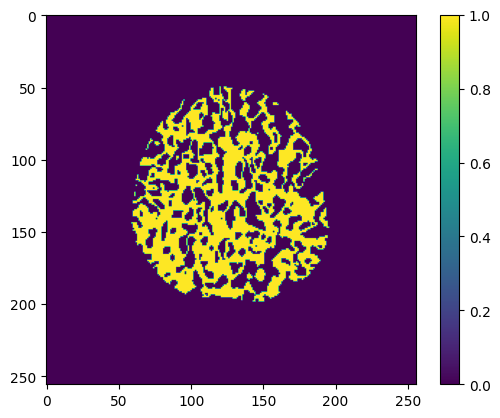

In [84]:
mask = (img_real_A_u>200).astype(np.uint8)
plt.imshow(mask)
plt.colorbar()
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img_real_A_u)
compute_SSIM = structural_similarity(img_real_A_u, img_fake_A_u, mask=mask, gaussian_weights=True, sigma=1.5, use_sample_covariance=False, data_range=max_val)
print(compute_SSIM)
print(f"Minimum Pixel Value: {min_val}")
print(f"Maximum Pixel Value: {max_val}")

In [93]:
num_patients = 0
patient_ids = []

metrics_classA = ['PSNR_'+classA,'SSIM_'+classA,'RMSE_'+classA,'UQI_'+classA]
metrics_classB = ['PSNR_'+classB,'SSIM_'+classB,'RMSE_'+classB,'UQI_'+classB]
metrics_classC = ['PSNR_'+classC,'SSIM_'+classC,'RMSE_'+classC,'UQI_'+classC]
metrics_classD = ['PSNR_'+classD,'SSIM_'+classD,'RMSE_'+classD,'UQI_'+classD]


#datapath = os.path.join(datapath,'test_latest','images')
datapath_contents = os.listdir(datapath_fake)
print(datapath_contents)
temp_list = [filename[:6] for filename in datapath_contents if filename[0]!='.' and len(filename)>=6]
[patient_ids.append(id) for id in temp_list if id not in patient_ids]

print(patient_ids)

results_A = pd.DataFrame(index = patient_ids, columns = metrics_classA)
results_B = pd.DataFrame(index = patient_ids, columns = metrics_classB)
results_C = pd.DataFrame(index = patient_ids, columns = metrics_classC)
results_D = pd.DataFrame(index = patient_ids, columns = metrics_classD)

print(results_A)

['10341101_1.png', '10341101_10.png', '10341101_2.png', '10341101_3.png', '10341101_4.png', '10341101_5.png', '10341101_6.png', '10341101_7.png', '10341101_8.png', '10341101_9.png', '10535801_1.png', '10535801_10.png', '10535801_2.png', '10535801_3.png', '10535801_4.png', '10535801_5.png', '10535801_6.png', '10535801_7.png', '10535801_8.png', '10535801_9.png', '11526001_1.png', '11526001_10.png', '11526001_2.png', '11526001_3.png', '11526001_4.png', '11526001_5.png', '11526001_6.png', '11526001_7.png', '11526001_8.png', '11526001_9.png', '12020501_1.png', '12020501_10.png', '12020501_2.png', '12020501_3.png', '12020501_4.png', '12020501_5.png', '12020501_6.png', '12020501_7.png', '12020501_8.png', '12020501_9.png', '13305701_1.png', '13305701_10.png', '13305701_2.png', '13305701_3.png', '13305701_4.png', '13305701_5.png', '13305701_6.png', '13305701_7.png', '13305701_8.png', '13305701_9.png', '13500301_1.png', '13500301_10.png', '13500301_2.png', '13500301_3.png', '13500301_4.png', '13

In [94]:
for pid in patient_ids:
    print(pid)
    ppath = os.path.join(datapath_fake,(pid+'*.png'))
    pfiles = glob.glob(ppath)
    
    pPSNR_A = 0.00
    pSSIM_A = 0.00
    pRNMSE_A = 0.00
    #pVIFP_A = 0.00
    pUQI_A = 0.00
    #pSCC_A = 0.00

    pPSNR_B = 0.00
    pSSIM_B = 0.00
    pRNMSE_B = 0.00
    #pVIFP_B = 0.00
    pUQI_B = 0.00
    #pSCC_B = 0.00

    pPSNR_C = 0.00
    pSSIM_C = 0.00
    pRNMSE_C = 0.00
    #pVIFP_C = 0.00
    pUQI_C = 0.00
    #pSCC_C = 0.00

    pPSNR_D = 0.00
    pSSIM_D = 0.00
    pRNMSE_D = 0.00
    #pVIFP_D = 0.00
    pUQI_D = 0.00
    #pSCC_D = 0.00
    #print(len(pfiles))
    
    for file in pfiles:
        path_orig, file_fake = os.path.split(file)
        #file_real = file_fake.replace('_output','').replace('png','bmp')
        #file_real = file_fake.replace('_output','')
        file_real = file_fake
        
        img_fake = cv2.imread(os.path.join(datapath_fake,file_fake))
        img_real = cv2.imread(os.path.join(datapath_real,file_real))
        
        unit = int(img_fake.shape[1] / 4)
        #print(unit)
        img_fake_A_u = make_gray(img_fake[:,0:unit,:])        # MTT
        img_fake_B_u = make_gray(img_fake[:,unit:unit*2,:])   # TTP
        img_fake_C_u = make_gray(img_fake[:,unit*2:unit*3,:]) # CBF
        img_fake_D_u = make_gray(img_fake[:,unit*3:,:])       # CBV
        
        # don't start at 0 because first one is NCCT
        img_real_A_u = make_gray(img_real[:,unit:unit*2,:])
        img_real_B_u = make_gray(img_real[:,unit*2:unit*3,:])
        img_real_C_u = make_gray(img_real[:,unit*3:unit*4,:])
        img_real_D_u = make_gray(img_real[:,unit*4:,:])
        
        
        
        x_a,y_a,w_a,h_a = cv2.boundingRect(img_real_A_u)
        x_b,y_b,w_b,h_b = cv2.boundingRect(img_real_B_u)
        x_c,y_c,w_c,h_c = cv2.boundingRect(img_real_C_u)
        x_d,y_d,w_d,h_d = cv2.boundingRect(img_real_D_u)
        
        # img_real_X is unused
        img_real_A_orig = img_real_A_u[y_a:y_a+h_a, x_a:x_a+w_a].astype('float')
        img_real_A = cv2.normalize(img_real_A_orig, None, 0.0, 12.0, cv2.NORM_MINMAX) # Old - 20 upperbound 
        img_fake_A_orig = img_fake_A_u[y_a:y_a+h_a, x_a:x_a+w_a].astype('float')
        img_fake_A = cv2.normalize(img_fake_A_orig, None, 0.0, 12.0, cv2.NORM_MINMAX)
        img_real_B_orig = img_real_B_u[y_b:y_b+h_b, x_b:x_b+w_b].astype('float')
        img_real_B = cv2.normalize(img_real_B_orig, None, 0.0, 25.0, cv2.NORM_MINMAX) # Old - 12 upperbound
        img_fake_B_orig = img_fake_B_u[y_b:y_b+h_b, x_b:x_b+w_b].astype('float')
        img_fake_B = cv2.normalize(img_fake_B_orig, None, 0.0, 25.0, cv2.NORM_MINMAX)
        img_real_C_orig = img_real_C_u[y_c:y_c+h_c, x_c:x_c+w_c].astype('float')
        img_real_C = cv2.normalize(img_real_C_orig, None, 0.0, 60.0, cv2.NORM_MINMAX)
        img_fake_C_orig = img_fake_C_u[y_c:y_c+h_c, x_c:x_c+w_c].astype('float')
        img_fake_C = cv2.normalize(img_fake_C_orig, None, 0.0, 60.0, cv2.NORM_MINMAX)
        img_real_D_orig = img_real_D_u[y_d:y_d+h_d, x_d:x_d+w_d].astype('float')
        img_real_D = cv2.normalize(img_real_D_orig, None, 0.0, 4.0, cv2.NORM_MINMAX)
        img_fake_D_orig = img_fake_D_u[y_d:y_d+h_d, x_d:x_d+w_d].astype('float')
        img_fake_D = cv2.normalize(img_fake_D_orig, None, 0.0, 4.0, cv2.NORM_MINMAX)
        
        img_real_A2_orig = img_real_A_u[y_a:y_a+h_a, x_a:x_a+w_a]
        img_fake_A2_orig = img_fake_A_u[y_a:y_a+h_a, x_a:x_a+w_a]
        img_real_B2_orig = img_real_B_u[y_b:y_b+h_b, x_b:x_b+w_b]
        img_fake_B2_orig = img_fake_B_u[y_b:y_b+h_b, x_b:x_b+w_b]
        img_real_C2_orig = img_real_C_u[y_c:y_c+h_c, x_c:x_c+w_c]
        img_fake_C2_orig = img_fake_C_u[y_c:y_c+h_c, x_c:x_c+w_c]
        img_real_D2_orig = img_real_D_u[y_d:y_d+h_d, x_d:x_d+w_d]
        img_fake_D2_orig = img_fake_D_u[y_d:y_d+h_d, x_d:x_d+w_d]
        
        
        """
        print(img_fake_A.shape)
        print(img_fake_B.shape)
        print(img_fake_C.shape)
        print(img_fake_D.shape)
        print(img_real_A.shape)
        print(img_real_B.shape)
        print(img_real_C.shape)
        print(img_real_D.shape)
        
        
        #PSNR, SSIM, RNMSE, VIF, VIFP, UQI, SCC
        compute_PSNR = cv2.PSNR(img_1, img_2)
        compute_SSIM = structural_similarity(make_gray(img_1), make_gray(img_2))
        #compute_RNMSE = sqrt(mean_squared_error(make_gray(img_1), make_gray(img_2)))
        compute_RNMSE = rmsdiff(img_1, img_2)
        #compute_VIF = vifvec(img_1, img_2)
        compute_VIFP = fr.vifp(img_1, img_2)
        compute_UQI = fr.uqi(img_1, img_2)
        compute_SCC = fr.scc(img_1, img_2)
        """
        """
        img_fake_A_u[img_fake_A_u==0]=np.nan
        img_fake_B_u[img_fake_B_u==0]=np.nan
        img_fake_C_u[img_fake_C_u==0]=np.nan
        img_fake_D_u[img_fake_D_u==0]=np.nan
        img_real_A_u[img_real_A_u==0]=np.nan
        img_real_B_u[img_real_B_u==0]=np.nan
        img_real_C_u[img_real_C_u==0]=np.nan
        img_real_D_u[img_real_D_u==0]=np.nan
        """
        """
        (compute_PSNR_A, compute_RNMSE_A) = allmetrics(img_fake_A, img_real_A)
        (compute_PSNR_B, compute_RNMSE_B) = allmetrics(img_fake_B, img_real_B)
        (compute_PSNR_C, compute_RNMSE_C) = allmetrics(img_fake_C, img_real_C)
        (compute_PSNR_D, compute_RNMSE_D) = allmetrics(img_fake_D, img_real_D)
        """
        
        (compute_PSNR_A, compute_RNMSE_A) = allmetrics(img_fake_A_orig, img_real_A_orig)
        (compute_PSNR_B, compute_RNMSE_B) = allmetrics(img_fake_B_orig, img_real_B_orig)
        (compute_PSNR_C, compute_RNMSE_C) = allmetrics(img_fake_C_orig, img_real_C_orig)
        (compute_PSNR_D, compute_RNMSE_D) = allmetrics(img_fake_D_orig, img_real_D_orig)
        
        """
        (compute_SSIM_A, compute_UQI_A) = allmetrics_orig(img_fake_A_orig, img_real_A_orig)
        (compute_SSIM_B, compute_UQI_B) = allmetrics_orig(img_fake_B_orig, img_real_B_orig)
        (compute_SSIM_C, compute_UQI_C) = allmetrics_orig(img_fake_C_orig, img_real_C_orig)
        (compute_SSIM_D, compute_UQI_D) = allmetrics_orig(img_fake_D_orig, img_real_D_orig)
        """
        #best results
        
        #(compute_PSNR_A, compute_RNMSE_A) = allmetrics(img_fake_A, img_real_A)
        #(compute_PSNR_B, compute_RNMSE_B) = allmetrics(img_fake_B, img_real_B)
        #(compute_PSNR_C, compute_RNMSE_C) = allmetrics(img_fake_C, img_real_C)
        #(compute_PSNR_D, compute_RNMSE_D) = allmetrics(img_fake_D, img_real_D)
        
        # Uncomment - Commented for testing bounding box on SSIM and UQI
        (compute_SSIM_A, compute_UQI_A) = allmetrics_orig(img_fake_A_u, img_real_A_u)
        (compute_SSIM_B, compute_UQI_B) = allmetrics_orig(img_fake_B_u, img_real_B_u)
        (compute_SSIM_C, compute_UQI_C) = allmetrics_orig(img_fake_C_u, img_real_C_u)
        (compute_SSIM_D, compute_UQI_D) = allmetrics_orig(img_fake_D_u, img_real_D_u)
        #(compute_SSIM_A, compute_UQI_A) = allmetrics_orig(img_fake_A2_orig, img_real_A2_orig)
        #(compute_SSIM_B, compute_UQI_B) = allmetrics_orig(img_fake_B2_orig, img_real_B2_orig)
        #(compute_SSIM_C, compute_UQI_C) = allmetrics_orig(img_fake_C2_orig, img_real_C2_orig)
        #(compute_SSIM_D, compute_UQI_D) = allmetrics_orig(img_fake_D2_orig, img_real_D2_orig)
    
        pPSNR_A += compute_PSNR_A
        pSSIM_A += compute_SSIM_A
        pRNMSE_A += compute_RNMSE_A
        #pVIF += compute_VIF
        #pVIFP_A += compute_VIFP_A
        pUQI_A += compute_UQI_A
        #pSCC_A += compute_SCC_A

        pPSNR_B += compute_PSNR_B
        pSSIM_B += compute_SSIM_B
        pRNMSE_B += compute_RNMSE_B
        #pVIF += compute_VIF
        #pVIFP_B += compute_VIFP_B
        pUQI_B += compute_UQI_B
        #pSCC_B += compute_SCC_B
        
        pPSNR_C += compute_PSNR_C
        pSSIM_C += compute_SSIM_C
        pRNMSE_C += compute_RNMSE_C
        #pVIF += compute_VIF
        #pVIFP_C += compute_VIFP_C
        pUQI_C += compute_UQI_C
        #pSCC_C += compute_SCC_C

        pPSNR_D += compute_PSNR_D
        pSSIM_D += compute_SSIM_D
        pRNMSE_D += compute_RNMSE_D
        #pVIF += compute_VIF
        #pVIFP_D += compute_VIFP_D
        pUQI_D += compute_UQI_D
        #pSCC_D += compute_SCC_D
        
    pPSNR_A = pPSNR_A / len(pfiles)
    pSSIM_A = pSSIM_A / len(pfiles)
    pRNMSE_A = pRNMSE_A / len(pfiles)
    #pVIF_A = pVIF_A / len(pfiles)
    #pVIFP_A = pVIFP_A / len(pfiles)
    pUQI_A = pUQI_A / len(pfiles)
    #pSCC_A = pSCC_A / len(pfiles)

    pPSNR_B = pPSNR_B / len(pfiles)
    pSSIM_B = pSSIM_B / len(pfiles)
    pRNMSE_B = pRNMSE_B / len(pfiles)
    #pVIF_B = pVIF_B / len(pfiles)
    #pVIFP_B = pVIFP_B / len(pfiles)
    pUQI_B = pUQI_B / len(pfiles)
    #pSCC_B = pSCC_B / len(pfiles)

    pPSNR_C = pPSNR_C / len(pfiles)
    pSSIM_C = pSSIM_C / len(pfiles)
    pRNMSE_C = pRNMSE_C / len(pfiles)
    #pVIF_C = pVIF_C / len(pfiles)
    #pVIFP_C = pVIFP_C / len(pfiles)
    pUQI_C = pUQI_C / len(pfiles)
    #pSCC_C = pSCC_C / len(pfiles)

    pPSNR_D = pPSNR_D / len(pfiles)
    pSSIM_D = pSSIM_D / len(pfiles)
    pRNMSE_D = pRNMSE_D / len(pfiles)
    #pVIF_D = pVIF_D / len(pfiles)
    #pVIFP_D = pVIFP_D / len(pfiles)
    pUQI_D = pUQI_D / len(pfiles)
    #pSCC_D = pSCC_D / len(pfiles)
    
    results_A['PSNR_'+classA][pid] = pPSNR_A
    results_A['SSIM_'+classA][pid] = pSSIM_A
    results_A['RMSE_'+classA][pid] = pRNMSE_A
    #results['VIF_'+classA][pid] = pVIF_A
    #results_A['VIFP_'+classA][pid] = pVIFP_A
    results_A['UQI_'+classA][pid] = pUQI_A
    #results_A['SCC_'+classA][pid] = pSCC_A

    results_B['PSNR_'+classB][pid] = pPSNR_B
    results_B['SSIM_'+classB][pid] = pSSIM_B
    results_B['RMSE_'+classB][pid] = pRNMSE_B
    #results['VIF_'+classB][pid] = pVIF_B
    #results_B['VIFP_'+classB][pid] = pVIFP_B
    results_B['UQI_'+classB][pid] = pUQI_B
    #results_B['SCC_'+classB][pid] = pSCC_B

    results_C['PSNR_'+classC][pid] = pPSNR_C
    results_C['SSIM_'+classC][pid] = pSSIM_C
    results_C['RMSE_'+classC][pid] = pRNMSE_C
    #results['VIF_'+classC][pid] = pVIF_C
    #results_C['VIFP_'+classC][pid] = pVIFP_C
    results_C['UQI_'+classC][pid] = pUQI_C
    #results_C['SCC_'+classC][pid] = pSCC_C
    
    results_D['PSNR_'+classD][pid] = pPSNR_D
    results_D['SSIM_'+classD][pid] = pSSIM_D
    results_D['RMSE_'+classD][pid] = pRNMSE_D
    #results['VIF_'+classD][pid] = pVIF_D
    #results_D['VIFP_'+classD][pid] = pVIFP_D
    results_D['UQI_'+classD][pid] = pUQI_D
    #results_D['SCC_'+classD][pid] = pSCC_D

    print(f'Done with patient {pid}')
    print(results_A)
    print(results_B)
    print(results_C)
    print(results_D)
    

103411
Done with patient 103411
         PSNR_MTT SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272  0.78669  49.555489  0.955132
105358        NaN      NaN        NaN       NaN
115260        NaN      NaN        NaN       NaN
120205        NaN      NaN        NaN       NaN
133057        NaN      NaN        NaN       NaN
...           ...      ...        ...       ...
973389        NaN      NaN        NaN       NaN
991933        NaN      NaN        NaN       NaN
993020        NaN      NaN        NaN       NaN
997188        NaN      NaN        NaN       NaN
998694        NaN      NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP  RMSE_TTP   UQI_TTP
103411  12.505292  0.734733  60.65464  0.871002
105358        NaN       NaN       NaN       NaN
115260        NaN       NaN       NaN       NaN
120205        NaN       NaN       NaN       NaN
133057        NaN       NaN       NaN       NaN
...           ...       ...       ...       ...
973389        NaN       NaN     

Done with patient 133057
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 141562
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 152526
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 163870
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 168840
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 179862
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 196167
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 221062
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 228768
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 261678
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 269151
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 291355
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 301366
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 353743
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 366672
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 377672
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 401462
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 416818
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 463455
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 491559
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 526513
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 553924
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 592712
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 616610
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 630518
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 667488
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 685450
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 729434
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 774221
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 790303
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 801581
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 820632
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 837125
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 876932
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 896475
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 922538
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 933385
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 963301
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389        NaN       NaN        NaN       NaN
991933        NaN       NaN        NaN       NaN
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389        NaN   

Done with patient 991933
         PSNR_MTT  SSIM_MTT   RMSE_MTT   UQI_MTT
103411  14.289272   0.78669  49.555489  0.955132
105358  15.198622  0.778293  44.784122  0.958562
115260  13.249601   0.86279  56.215968  0.955984
120205   13.32825  0.765957  55.281917   0.94003
133057  13.511604  0.793604  54.313606  0.947687
...           ...       ...        ...       ...
973389  14.506949  0.764653  48.227341  0.951944
991933  13.958179  0.833342  52.233991  0.950445
993020        NaN       NaN        NaN       NaN
997188        NaN       NaN        NaN       NaN
998694        NaN       NaN        NaN       NaN

[160 rows x 4 columns]
         PSNR_TTP  SSIM_TTP   RMSE_TTP   UQI_TTP
103411  12.505292  0.734733   60.65464  0.871002
105358  13.856113  0.733663  52.477733  0.890073
115260  12.844391  0.796989  58.497935  0.858995
120205  11.746407  0.709896  66.303029  0.868128
133057  12.470225   0.74179   61.10526  0.861547
...           ...       ...        ...       ...
973389  14.292367  0

0.7431823320080392 0.952448689339585
0.20877140080673284 0.9134663418315346
Minimum Pixel Value: 0.0
Maximum Pixel Value: 225.0


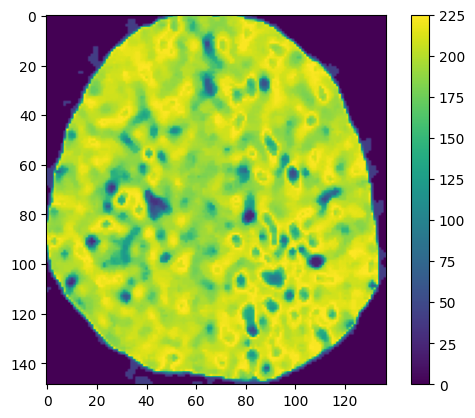

In [46]:
import matplotlib.pyplot as plt
(compute_SSIM_A, compute_UQI_A) = allmetrics_orig(img_fake_A_u, img_real_A_u)

img_real_A2_orig = img_real_A_u[y_a:y_a+h_a, x_a:x_a+w_a].astype(float)
img_fake_A2_orig = img_fake_A_u[y_a:y_a+h_a, x_a:x_a+w_a].astype(float)

(compute_SSIM_A2, compute_UQI_A2) = allmetrics_orig(img_fake_A2_orig, img_real_A2_orig)

print(compute_SSIM_A, compute_UQI_A)
print(compute_SSIM_A2, compute_UQI_A2)

plt.imshow(img_fake_A2_orig)
plt.colorbar()
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img_fake_B_u)
print(f"Minimum Pixel Value: {min_val}")
print(f"Maximum Pixel Value: {max_val}")

In [95]:
if not os.path.isdir(results_savepath):
    if not os.path.isdir(outputpath):
        os.mkdir(outputpath)
        
    if not os.path.isdir(results_savepath):
        os.mkdir(results_savepath)

classE = r'Mean and Standard Dev'

means_A = results_A.mean().to_frame().T
median_A = results_A.median().to_frame().T
std_A = results_A.std().to_frame().T
means_A.index = ['Means']
median_A.index = ['Median']
std_A.index = ['StD']
means_A = pd.concat([means_A,median_A,std_A])


means_B = results_B.mean().to_frame().T
median_B = results_B.median().to_frame().T
std_B = results_B.std().to_frame().T
means_B.index = ['Means']
median_B.index = ['Median']
std_B.index = ['StD']
means_B = pd.concat([means_B,median_B,std_B])

means_C = results_C.mean().to_frame().T
median_C = results_C.median().to_frame().T
std_C = results_C.std().to_frame().T
means_C.index = ['Means']
median_C.index = ['Median']
std_C.index = ['StD']
means_C = pd.concat([means_C,median_C,std_C])

means_D = results_D.mean().to_frame().T
median_D = results_D.median().to_frame().T
std_D = results_D.std().to_frame().T
means_D.index = ['Means']
median_D.index = ['Median']
std_D.index = ['StD']
means_D = pd.concat([means_D,median_D,std_D])
        
with pd.ExcelWriter(results_savename) as writer:
    results_A.to_excel(writer, sheet_name=classA)
    results_B.to_excel(writer, sheet_name=classB)
    results_C.to_excel(writer, sheet_name=classC)
    results_D.to_excel(writer, sheet_name=classD)
    means_A.to_excel(writer, sheet_name=classE)
    means_B.to_excel(writer, sheet_name=classE, startrow=5)
    means_C.to_excel(writer, sheet_name=classE, startrow=10)
    means_D.to_excel(writer, sheet_name=classE, startrow=15)

print('Done saving results!')

Done saving results!


In [45]:
means_A = results_A.mean().to_frame().T
median_A = results_A.median().to_frame().T
std_A = results_A.std().to_frame().T
means_A.index = ['Means']
median_A.index = ['Median']
std_A.index = ['StD']
means_A = pd.concat([means_A,median_A,std_A])
means_A

,PSNR_MTT,SSIM_MTT,RMSE_MTT,UQI_MTT
Means,13.323768,0.802439,57.993682,0.949705
Median,13.784207,0.802349,53.056576,0.961516
StD,2.35464,0.031507,18.827944,0.033774


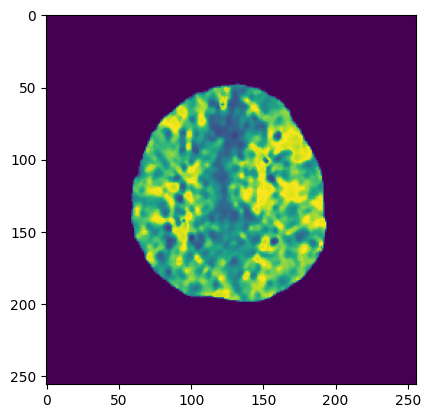

In [77]:
import matplotlib.pyplot as plt
plt.imshow(img_fake_B_u)


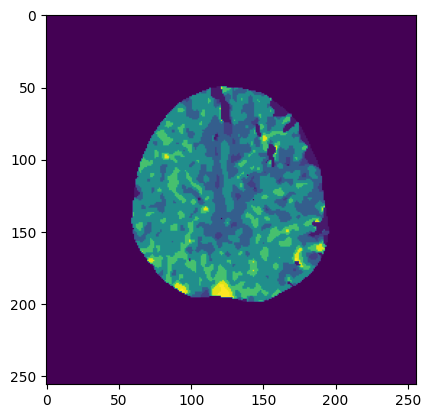

In [76]:
plt.imshow(img_real_B_u)

In [79]:
fr.uqi(img_fake_B_u,img_real_B_u)

0.9189436194487037